In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

In [3]:
files = ['full_songs/rock1.wav', 'full_songs/folk1.wav', librosa.example('nutcracker')]
y = []
sr = []
print(files)
for i in range(3):
    print(files[i])
    y.append([])
    sr.append([])
    y[i], sr[i] = librosa.load(files[i])
    print('y = ', y[i])
    print('sr = ', sr[i])

['full_songs/rock1.wav', 'full_songs/folk1.wav', 'C:\\Users\\dirto\\AppData\\Local\\librosa\\librosa\\Cache\\Kevin_MacLeod_-_P_I_Tchaikovsky_Dance_of_the_Sugar_Plum_Fairy.ogg']
full_songs/rock1.wav
y =  [ 2.79414962e-07 -2.14049578e-07  5.59779255e-06 ... -3.51738345e-06
 -1.11379585e-07  6.82292102e-06]
sr =  22050
full_songs/folk1.wav
y =  [ 5.7128932e-07 -1.0011192e-06  2.0691309e-06 ...  8.0156788e-06
 -1.0126948e-05  6.2398976e-06]
sr =  22050
C:\Users\dirto\AppData\Local\librosa\librosa\Cache\Kevin_MacLeod_-_P_I_Tchaikovsky_Dance_of_the_Sugar_Plum_Fairy.ogg
y =  [ 2.2716868e-06  5.3327185e-06 -7.2473276e-06 ...  1.1170751e-05
  1.2871917e-06  5.4120615e-06]
sr =  22050


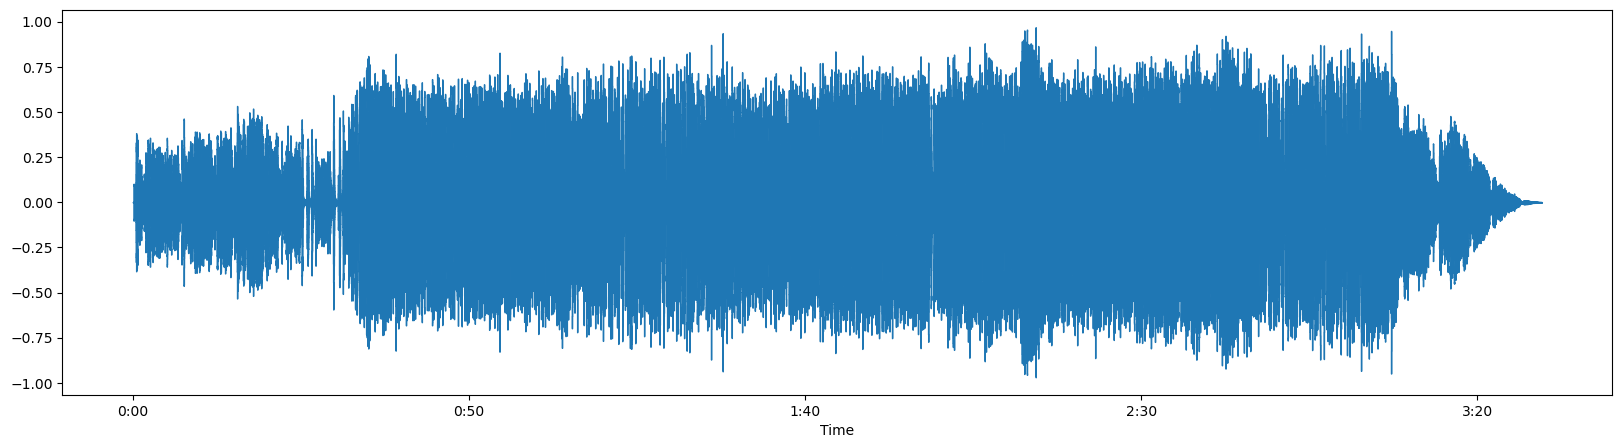

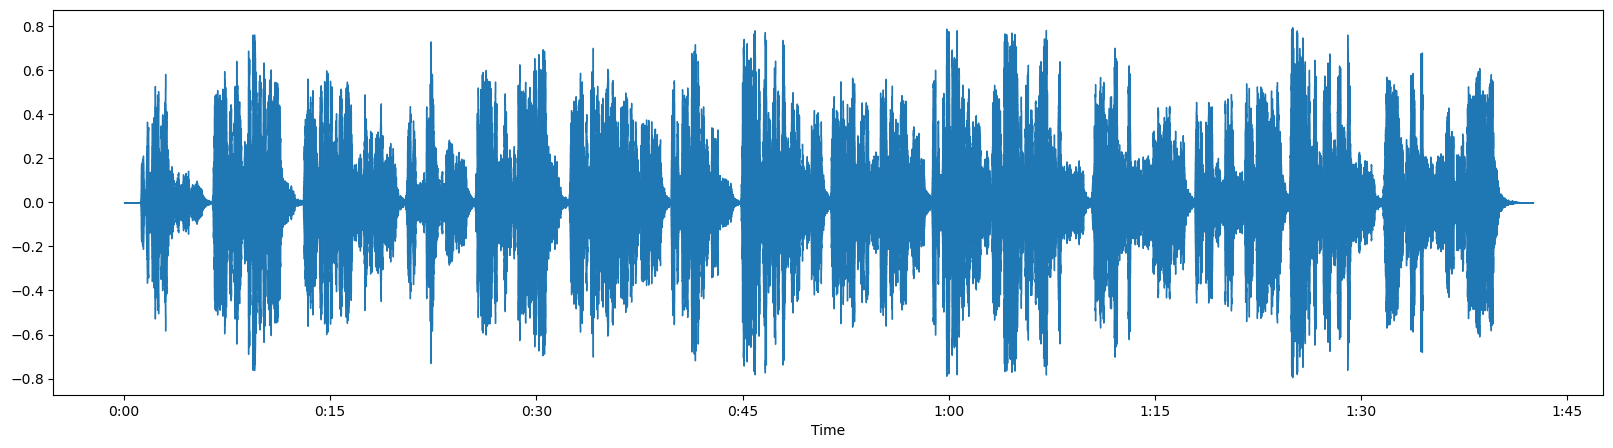

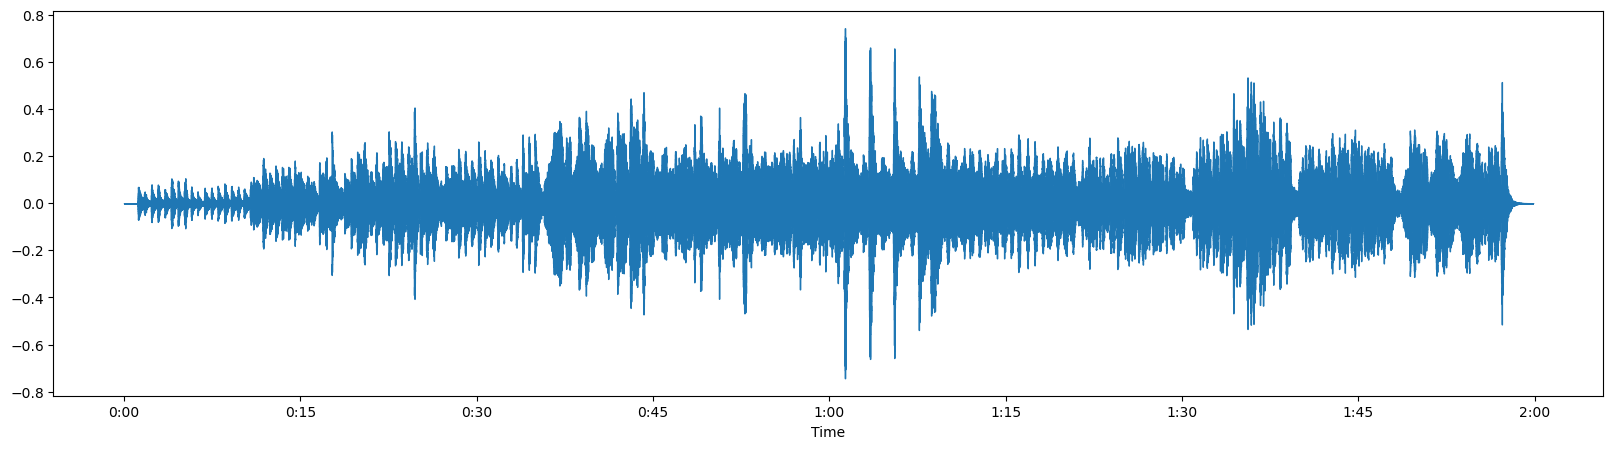

In [56]:
for i in range(3):
    plt.figure(figsize=(20, 5))
    librosa.display.waveshow(y[i], sr=sr[i])
    plt.show()

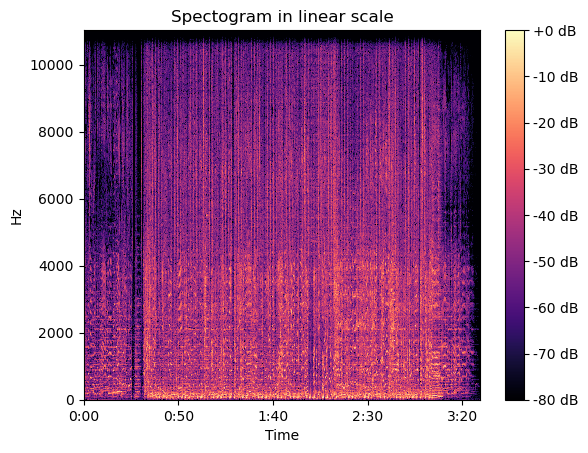

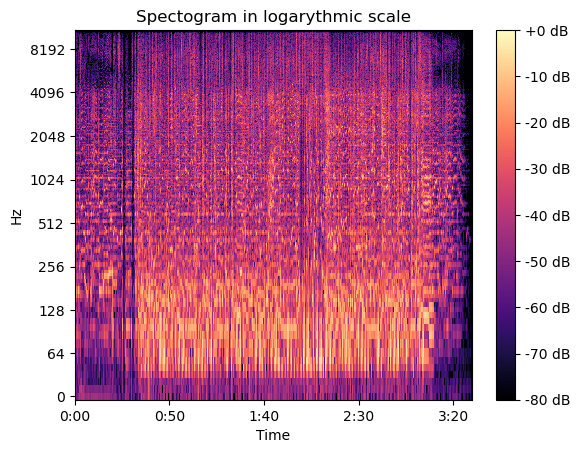

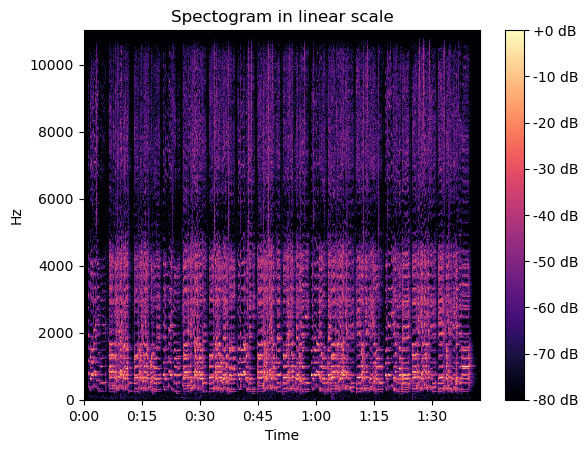

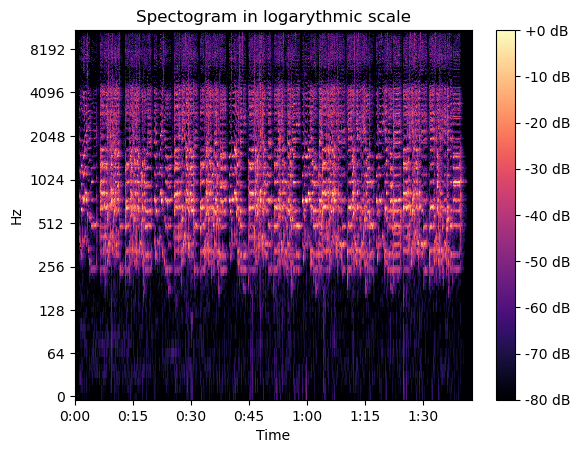

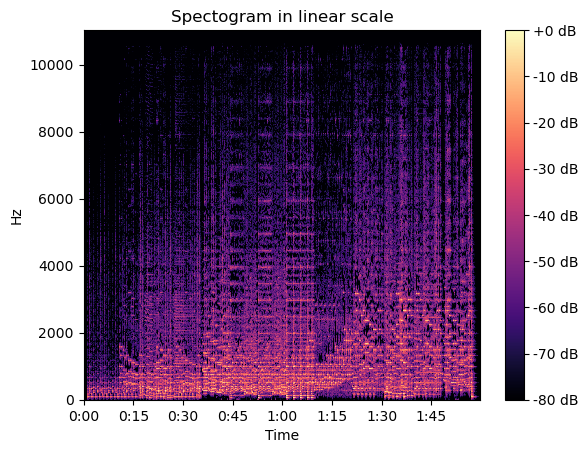

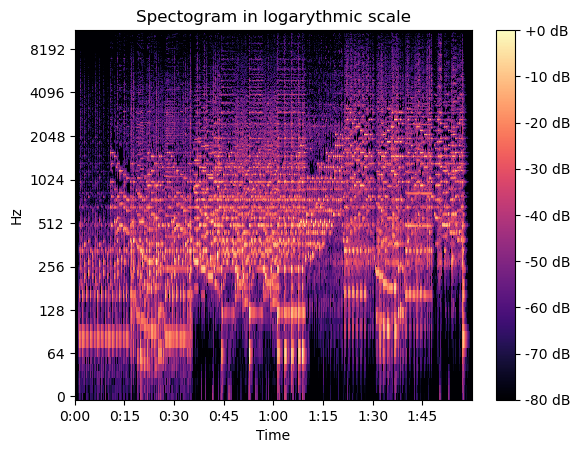

In [57]:
for i in range(3):    
    D = librosa.stft(y[i])  # STFT = short-time Fourier transform
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title='Spectogram in linear scale')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
    ax.set(title='Spectogram in logarythmic scale')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

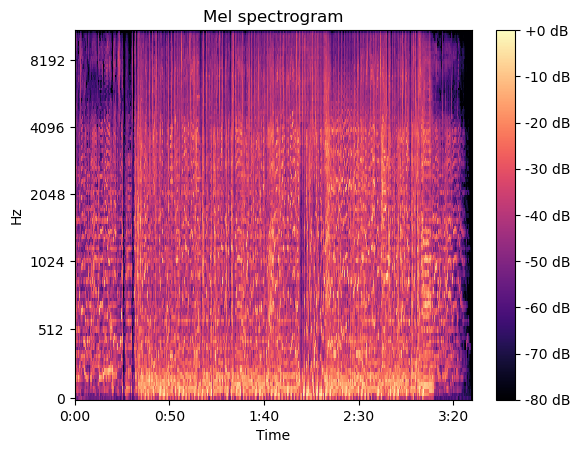

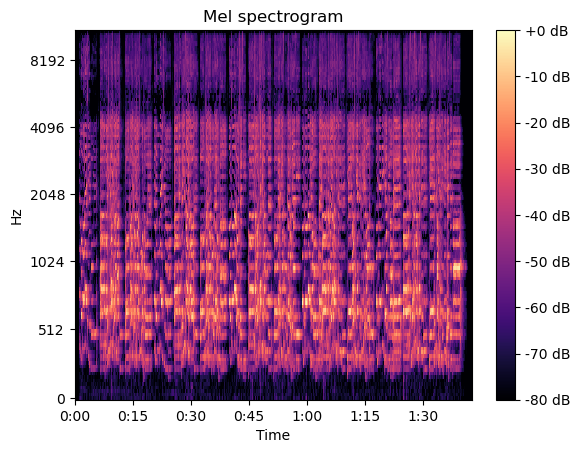

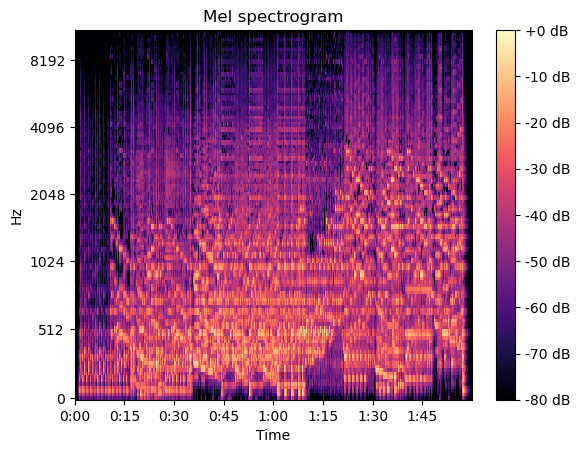

In [58]:
for i in range(3):
    fig, ax = plt.subplots()
    mel = librosa.feature.melspectrogram(y=y[i], sr=sr[i])
    mel_db = librosa.power_to_db(mel, ref=np.max)
    img = librosa.display.specshow(mel_db, y_axis='mel', x_axis='time', ax=ax)
    ax.set(title='Mel spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

Chorma =  [[0.54757375 0.53294325 0.53676397 ... 0.29578814 0.48127756 0.8283353 ]
 [0.48285833 0.7117425  0.6061237  ... 0.32762125 0.891427   1.        ]
 [0.52306175 0.77459854 0.89408976 ... 0.42288443 1.         0.9339566 ]
 ...
 [0.93461424 0.9119613  1.         ... 0.41934916 0.5915958  0.3573034 ]
 [0.6696505  0.53073066 0.5202564  ... 0.28463143 0.54924107 0.57818604]
 [0.5521755  0.39158282 0.4552168  ... 0.21308252 0.42561415 0.70808744]] (12, 9029)
Mean =  [0.4205667  0.3506069  0.41241667 0.3578012  0.41098788 0.464096
 0.4000676  0.4489437  0.3883446  0.4670257  0.3992063  0.34788162]


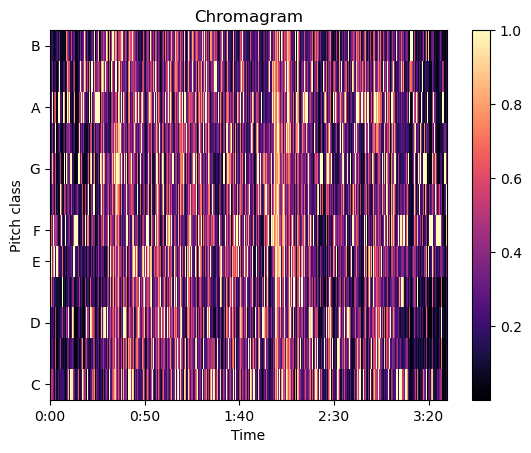

Chorma =  [[0.96436787 0.8170533  0.6934318  ... 0.7884078  0.70607704 0.6460347 ]
 [0.9584591  1.         0.9253427  ... 1.         0.8326063  0.77555966]
 [0.81150806 0.8346651  1.         ... 0.94281316 0.9570789  0.8391258 ]
 ...
 [0.45071036 0.41562936 0.4244831  ... 0.47028917 0.45357573 0.3758178 ]
 [0.6105978  0.56755954 0.60952294 ... 0.5546852  0.474662   0.37728876]
 [0.8170725  0.73372656 0.650053   ... 0.6529331  0.61127466 0.6322785 ]] (12, 4416)
Mean =  [0.15961689 0.15003923 0.14637858 0.3407163  0.3714123  0.22414266
 0.39693928 0.20152971 0.26035616 0.10023503 0.17005216 0.34680253]


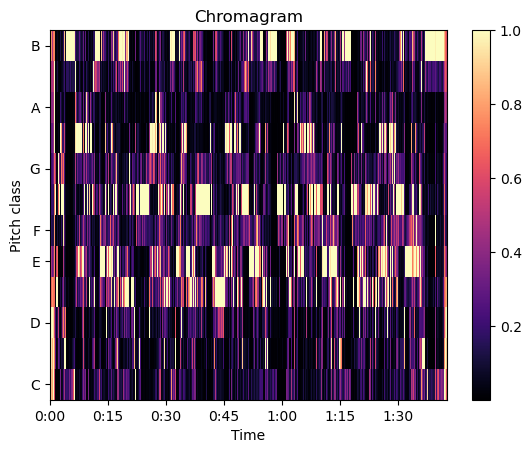

Chorma =  [[1.         0.95686096 0.73361415 ... 0.13945055 0.14316301 0.26656413]
 [0.6889905  0.75139886 0.59919995 ... 0.12660554 0.10302571 0.16190486]
 [0.92364764 1.         1.         ... 0.25967485 0.17342271 0.29054517]
 ...
 [0.66082907 0.8060107  0.6542876  ... 0.06554421 0.09700032 0.21168177]
 [0.48511913 0.6086193  0.83328676 ... 0.21253026 0.17956953 0.33065113]
 [0.6745773  0.6955445  0.9613534  ... 0.66404456 0.5531777  1.        ]] (12, 5163)
Mean =  [0.25442904 0.22944878 0.22174904 0.2631474  0.33100727 0.19945617
 0.36338615 0.30038616 0.14626534 0.194791   0.25794783 0.39936376]


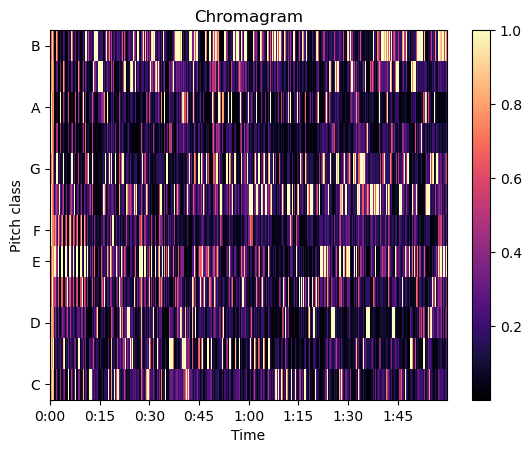

In [17]:
for i in range(3):
    chroma = librosa.feature.chroma_stft(y=y[i], sr=sr[i])
    print('Chorma = ', chroma, chroma.shape)
    print('Mean = ', chroma.mean(axis=1))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    ax.set(title='Chromagram')
    fig.colorbar(img, ax=ax)
    plt.show()

In [18]:
for i in range(3):
    zcr = librosa.feature.zero_crossing_rate(y[i])
    print('Zero-crossing rate = ', zcr, zcr.shape)
    print('Mean = ', zcr.mean())
    print('Std = ', zcr.std())

Zero-crossing rate =  [[0.25732422 0.29150391 0.32617188 ... 0.48632812 0.46484375 0.39599609]] (1, 9029)
Mean =  0.15246764548607267
Std =  0.07161263525006548
Zero-crossing rate =  [[0.37451172 0.55273438 0.73583984 ... 0.74267578 0.55078125 0.37109375]] (1, 4416)
Mean =  0.13146276059358017
Std =  0.0902061884599654
Zero-crossing rate =  [[0.28417969 0.42529297 0.55957031 ... 0.33642578 0.29736328 0.22070312]] (1, 5163)
Mean =  0.08719607967751307
Std =  0.0620940219754261


In [19]:
for i in range(3):
    centroid = librosa.feature.spectral_centroid(y=y[i], sr=sr[i])
    print('Spectral centroid = ', centroid, centroid.shape)
    print('Mean = ', centroid.mean())
    print('Std = ', centroid.std())

Spectral centroid =  [[4869.43086497 3549.99617047 3148.15965248 ... 3217.95284959
  4728.77836375 7433.18265835]] (1, 9029)
Mean =  2823.62028021018
Std =  800.053922578128
Spectral centroid =  [[7447.75419769 7485.94006927 7462.70990001 ... 7585.00509467
  7565.29434478 7504.06605762]] (1, 4416)
Mean =  2526.1399242440216
Std =  889.8606374440719
Spectral centroid =  [[6022.8335013  5909.7081502  5783.15389511 ... 4825.8989104
  5014.75896051 5007.97385782]] (1, 5163)
Mean =  1450.4101585407159
Std =  652.927523144119


In [20]:
for i in range(3):
    rolloff = librosa.feature.spectral_rolloff(y=y[i], sr=sr[i])
    print('Spectral roll-off = ', rolloff, rolloff.shape)
    print('Mean = ', rolloff.mean())
    print('Std = ', rolloff.std())

Spectral roll-off =  [[8957.8125     7579.6875     6912.15820312 ... 7235.15625
  9011.64550781 9722.24121094]] (1, 9029)
Mean =  5415.806879222505
Std =  1406.5228768657414
Spectral roll-off =  [[9883.74023438 9829.90722656 9776.07421875 ... 9786.84082031
  9851.44042969 9840.67382812]] (1, 4416)
Mean =  4610.485043733016
Std =  1581.7850947647623
Spectral roll-off =  [[9388.4765625  9076.24511719 9033.17871094 ... 8828.61328125
  9151.61132812 9119.31152344]] (1, 5163)
Mean =  2539.7543499872895
Std =  1209.8372965567794


MFCC =  [[-5.3092981e+02 -5.3056799e+02 -5.2239716e+02 ... -5.3006403e+02
  -5.3092981e+02 -5.3092981e+02]
 [ 0.0000000e+00  5.1159883e-01  1.1779329e+01 ...  1.2050753e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  5.1133639e-01  1.0971077e+01 ...  1.1492929e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  4.8707351e-01 -7.7795839e-01 ...  9.8031992e-01
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  4.8416430e-01 -8.2679391e-01 ...  1.0082181e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  4.8110789e-01 -5.3125286e-01 ...  1.0035053e+00
   0.0000000e+00  0.0000000e+00]] (20, 9029)
Mean =  [-7.1977859e+01  6.6912552e+01 -1.8827974e+01  2.6471373e+01
  2.3133683e+00  8.4714851e+00  8.0082960e+00  7.8955216e+00
 -7.6947846e+00  9.0931187e+00 -5.6398916e+00  4.3251638e+00
 -3.1923120e+00  8.1679085e-03 -6.7155474e-01 -8.5399497e-01
 -7.0741916e+00 -1.1915330e+00 -5.2751770e+00 -1.7903489e-01]
Std =  [91.93018   29.898998  23.078182  15.756527  12.040231  14.2

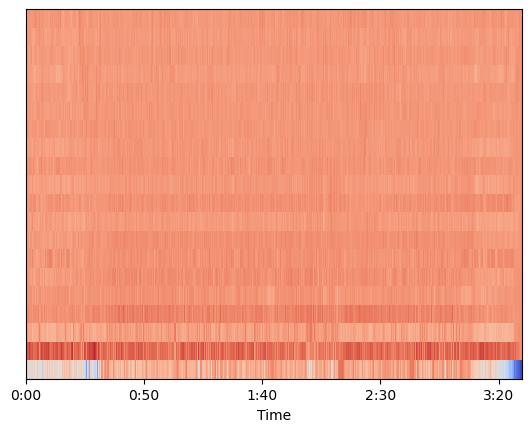

MFCC =  [[-505.755 -505.755 -505.755 ... -505.755 -505.755 -505.755]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 ...
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]] (20, 4416)
Mean =  [-206.05638     49.88292    -48.249958   -16.76684    -35.10921
  -45.136402   -12.409964   -24.419392   -26.62822     12.108293
  -19.6498       5.515025   -11.937862   -10.487216    -3.5070512
  -12.447755    -1.4612494    6.432356    -5.0022583   14.760389 ]
Std =  [92.31463  27.305126 24.862791 23.923641 19.227142 17.111279 17.983845
 11.249151 14.589192 17.075968 12.482451 11.382716 12.296615 12.060083
 10.297975 11.027422 12.297174 15.051336 16.302858 14.657861]


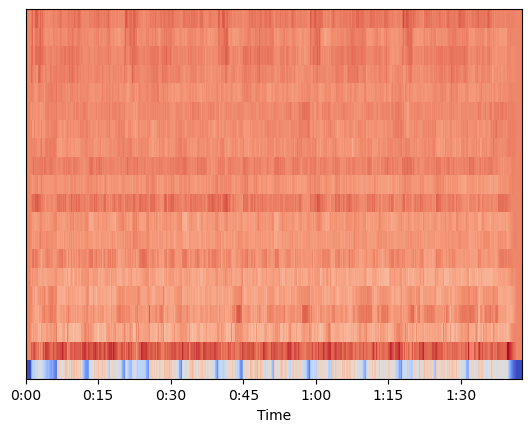

MFCC =  [[-602.36005 -602.36005 -602.36005 ... -602.36005 -602.36005 -602.36005]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]] (20, 5163)
Mean =  [-2.7236200e+02  1.2663517e+02 -3.2757439e+01  1.0313722e+01
 -1.8952078e+01 -9.6554022e+00 -1.5617303e+01 -1.0163858e+01
 -1.7376776e+01 -9.5249519e+00 -1.0311596e+01 -3.9946699e+00
 -9.1940689e+00 -5.4991398e+00 -4.7306180e+00 -3.1930397e+00
 -4.5421314e+00 -2.7606630e+00 -5.2508464e+00 -2.6214507e-01]
Std =  [94.93507  32.70166  31.085873 23.108768 21.798767 17.952963 17.351006
 14.091187 13.882411 11.734054 12.595209 12.683915 13.354177 11.725912
 12.222899 11.072574 11.80704  10.965596 10.582815 11.642408]


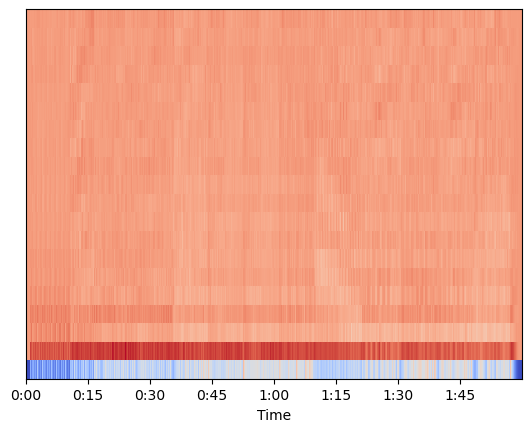

In [13]:
for i in range(3):
    mfccs = librosa.feature.mfcc(y=y[i], sr=sr[i])
    print('MFCC = ', mfccs, mfccs.shape)
    print('Mean = ', mfccs.mean(axis=1))
    print('Std = ', mfccs.std(axis=1))
    librosa.display.specshow(mfccs, sr=sr[i], x_axis='time')
    plt.show()

Spectral contrast =  [[ 6.91093327 12.27045615 11.96455094 ... 11.90696482 12.32843215
   7.68499478]
 [11.24210964  7.86005108 11.72825068 ...  6.28105381  4.21827064
   4.37261872]
 [11.87184959 11.44528667 14.40099527 ... 10.74151176 15.56714142
  11.84519143]
 ...
 [14.45355912 12.48920274 15.5844611  ... 13.61750668 14.6640021
  12.27836385]
 [16.65514539 16.17294821 18.19204988 ... 12.05829195 13.22262906
  17.21339933]
 [19.55920923 30.75901315 43.9079392  ... 43.72226786 31.70206436
  25.72544369]] (7, 9029)
Mean =  [20.52281472 15.86158663 19.24406555 19.43156375 19.12441945 19.97225794
 48.87631737]
Std =  [4.79883721 4.18212989 4.57862156 3.9782435  3.44960317 4.69263048
 3.70283614]


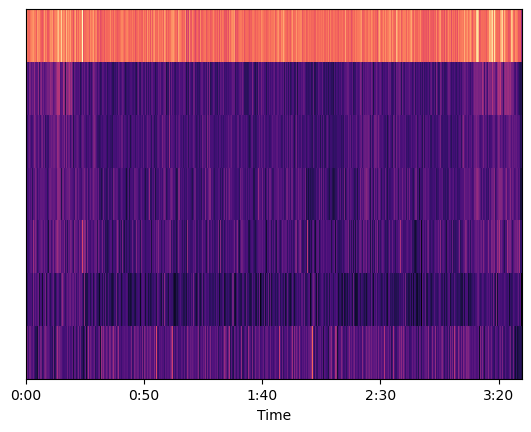

Spectral contrast =  [[ 8.58146855  8.44611733 12.22494004 ...  9.90762011 12.38243499
   6.88182929]
 [11.07378919  7.37509935  8.76871079 ... 10.65990914  8.80284917
  17.7065909 ]
 [ 7.39357086 12.00430508 10.31840342 ...  9.29193795 10.46173642
   6.30708432]
 ...
 [14.64471334 12.61769558 18.41178391 ... 12.9424854  13.79800155
  14.19106607]
 [18.26017227 18.71671605 22.14930961 ... 20.07184307 20.95015095
  17.30436951]
 [24.19797624 28.6593874  43.81379327 ... 43.6917194  18.97047132
  16.05999802]] (7, 4416)
Mean =  [13.50750416 22.19351093 25.41127736 25.73156458 26.023552   36.74971811
 52.82178379]
Std =  [ 5.23165223  5.82487029  6.36233498  6.20855389  6.83408067 10.79726907
  5.7706293 ]


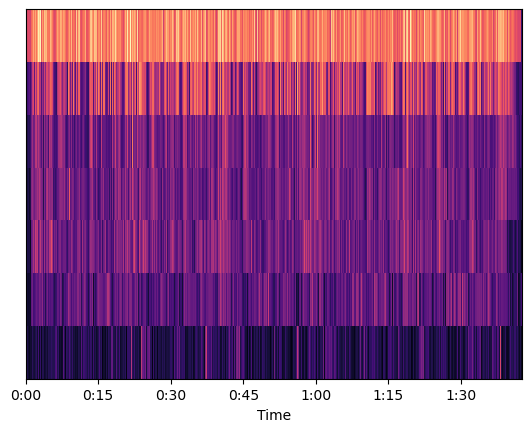

Spectral contrast =  [[ 0.25697716  0.25194504 14.480515   ... 12.94866984  0.95691599
   0.16038595]
 [ 0.88621624  0.87650006 14.480515   ... 15.61052774  8.64407579
   1.23830348]
 [ 5.99891808 13.70347024 43.04780981 ... 24.65321579 25.91638914
  25.48222495]
 ...
 [16.41913991 17.44884051 17.46170945 ... 26.7615755  29.70582084
  22.3443895 ]
 [12.59918648 17.49210279 16.59172957 ... 17.3980626  18.26092086
  20.24944914]
 [16.01633888 20.71808008 29.23581326 ... 21.71664092 21.80943163
  24.08932005]] (7, 5163)
Mean =  [25.4129535  18.47608955 21.52874996 24.8854115  25.9566661  27.80772164
 49.65730399]
Std =  [7.18547862 4.73501496 4.45900953 6.11186532 7.79356435 7.09682794
 9.7126575 ]


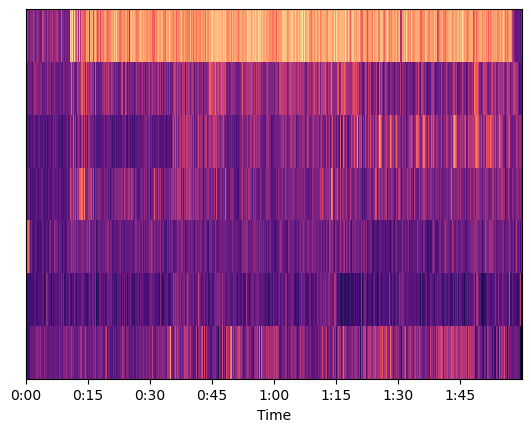

In [21]:
for i in range(3):
    stft = np.abs(librosa.stft(y[i]))
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sr[i])
    print('Spectral contrast = ', contrast, contrast.shape)
    print('Mean = ', contrast.mean(axis=1))
    print('Std = ', contrast.std(axis=1))
    librosa.display.specshow(contrast, sr=sr[i], x_axis='time')
    plt.show()

In [22]:
for i in range(3):
    tempo = librosa.feature.tempo(y=y[i], sr=sr[i])
    print('Tempo = ', tempo, tempo.shape)

Tempo =  [103.359375] (1,)
Tempo =  [123.046875] (1,)
Tempo =  [107.66601562] (1,)
